In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

pd.options.display.float_format='{:.2f}'.format
pd.options.display.max_rows=None
pd.options.display.max_columns=None
sns.set()

In [640]:


def wrangle(filename, encoding=None, date_column=None, dropna_nan_columns=[],dropna_nan_columns0=False, change_column_name={}, drop_duplicates_columns=None ):
    global df
    df = pd.read_csv(filename, encoding=encoding)  #0. Load the dataset

    #1. Clean column names: remove spaces and convert to lowercase
    df.columns = df.columns.str.strip().str.lower()

    #2. convert space to _
    df.columns=df.columns.str.replace(' ','_')


    #3- Convert the specified column to datetime if provided
    if date_column:
        df[date_column] = pd.to_datetime(df[date_column]) 

    #4- Drop all columns that contain only NaN values    
    if dropna_nan_columns0:
        df=df.dropna(axis=1 , how='all')    
    
    #5- Drop rows with NaN values in the specified columns
    if dropna_nan_columns:
        df.dropna(subset=dropna_nan_columns, inplace=True)
    
    #6- Rename columns if a mapping is provided
    if change_column_name:
        df.rename(columns=change_column_name, inplace=True)
    
    #7- Remove duplicate rows based on specified columns
    if drop_duplicates_columns:
        df.drop_duplicates(subset=drop_duplicates_columns, inplace=True)

    return df


In [641]:
df=wrangle('apple_sales_data.csv',date_column='date')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product_id       200 non-null    object        
 1   store_id         200 non-null    object        
 2   region           200 non-null    object        
 3   date             200 non-null    datetime64[ns]
 4   units_sold       200 non-null    int64         
 5   revenue          200 non-null    float64       
 6   cost             200 non-null    float64       
 7   profit           200 non-null    float64       
 8   customer_rating  200 non-null    float64       
 9   promotions_used  200 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 15.8+ KB


In [642]:
df.sample(10)

,product_id,store_id,region,date,units_sold,revenue,cost,profit,customer_rating,promotions_used
46,P8500,S30,South,2024-02-16,218,5782.31,6445.26,1609.41,2.08,3
97,P5131,S46,East,2024-04-07,264,7624.37,3599.11,477.21,3.98,5
40,P6534,S31,East,2024-02-10,320,8993.18,6743.48,149.68,4.99,1
176,P1492,S9,West,2024-06-25,382,8462.10,1421.73,1173.20,3.48,5
21,P1287,S9,West,2024-01-22,187,1425.01,7568.00,1933.52,3.91,3
7,P6242,S36,East,2024-01-08,418,5775.77,7516.88,866.10,1.15,2
18,P9041,S16,West,2024-01-19,496,8616.28,878.85,1598.62,1.89,1
115,P2258,S39,West,2024-04-25,416,7521.95,3354.70,1131.87,1.30,2
61,P3082,S47,South,2024-03-02,219,9175.27,977.24,412.83,2.50,1
183,P1016,S9,South,2024-07-02,314,3126.97,558.94,513.68,1.80,5


# Profit column correction


In [643]:
df['profit']=df['revenue']-df['cost']
df.head()

,product_id,store_id,region,date,units_sold,revenue,cost,profit,customer_rating,promotions_used
0,P9481,S31,North,2024-01-01,134,5859.33,5389.78,469.56,4.11,0
1,P5794,S29,North,2024-01-02,179,1216.38,2258.72,-1042.34,2.35,5
2,P2810,S14,East,2024-01-03,417,8207.84,6360.24,1847.60,1.09,5
3,P9069,S43,West,2024-01-04,250,1299.71,6263.57,-4963.86,3.38,4
4,P8196,S33,East,2024-01-05,454,4036.91,5675.40,-1638.50,4.29,0


# Identify which region generates the highest total revenue.


In [644]:
df1=df.groupby('region')['revenue'].sum().sort_values(ascending=False)
df1

region
South   407593.47
West    256317.41
East    240980.01
North   172069.15
Name: revenue, dtype: float64

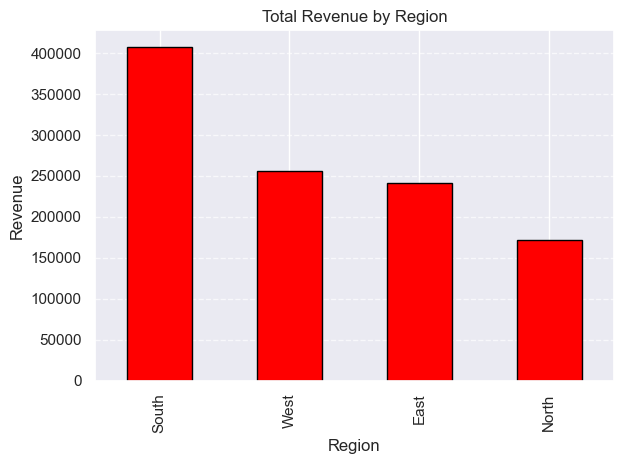

In [645]:
df1.plot(kind='bar' , x='region' , y='revenue' , color='red' , edgecolor='black')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Profit Margin Analysis: Calculate the profit margin for each row and determine the average profit margin across all sales.

In [646]:
df.head()

,product_id,store_id,region,date,units_sold,revenue,cost,profit,customer_rating,promotions_used
0,P9481,S31,North,2024-01-01,134,5859.33,5389.78,469.56,4.11,0
1,P5794,S29,North,2024-01-02,179,1216.38,2258.72,-1042.34,2.35,5
2,P2810,S14,East,2024-01-03,417,8207.84,6360.24,1847.60,1.09,5
3,P9069,S43,West,2024-01-04,250,1299.71,6263.57,-4963.86,3.38,4
4,P8196,S33,East,2024-01-05,454,4036.91,5675.40,-1638.50,4.29,0


In [647]:
avg_profit = df['profit'].mean()
print(f"Average Profit: {avg_profit:.2f}")


Average Profit: 1223.82


What is the average profit per region?

In [648]:
avg_profit_per_region = df.groupby('region')['profit'].mean().sort_values(ascending=False)
avg_profit_per_region

region
West    1699.76
South   1408.22
East    1323.22
North    183.18
Name: profit, dtype: float64

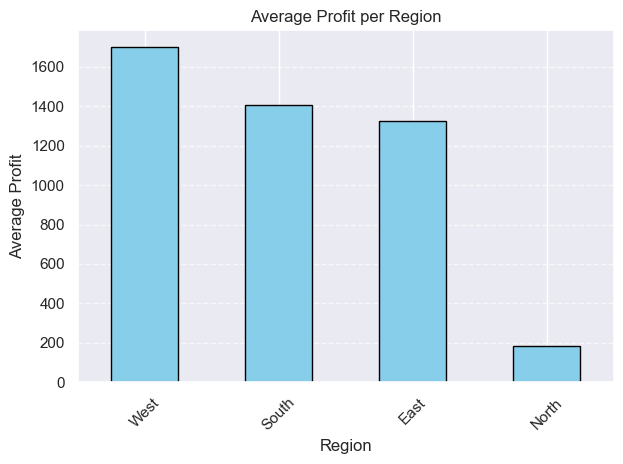

In [649]:
avg_profit_per_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Profit per Region')
plt.xlabel('Region')
plt.ylabel('Average Profit')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Customer Feedback Insight: Analyze the relationship between customer ratings and promotions used.

In [650]:
df.head()

,product_id,store_id,region,date,units_sold,revenue,cost,profit,customer_rating,promotions_used
0,P9481,S31,North,2024-01-01,134,5859.33,5389.78,469.56,4.11,0
1,P5794,S29,North,2024-01-02,179,1216.38,2258.72,-1042.34,2.35,5
2,P2810,S14,East,2024-01-03,417,8207.84,6360.24,1847.60,1.09,5
3,P9069,S43,West,2024-01-04,250,1299.71,6263.57,-4963.86,3.38,4
4,P8196,S33,East,2024-01-05,454,4036.91,5675.40,-1638.50,4.29,0


In [651]:
df2=df.groupby('promotions_used')['customer_rating'].sum().sort_values(ascending=False)
df2

promotions_used
2   114.56
0   111.35
1   107.53
5   101.46
4    86.67
3    82.03
Name: customer_rating, dtype: float64

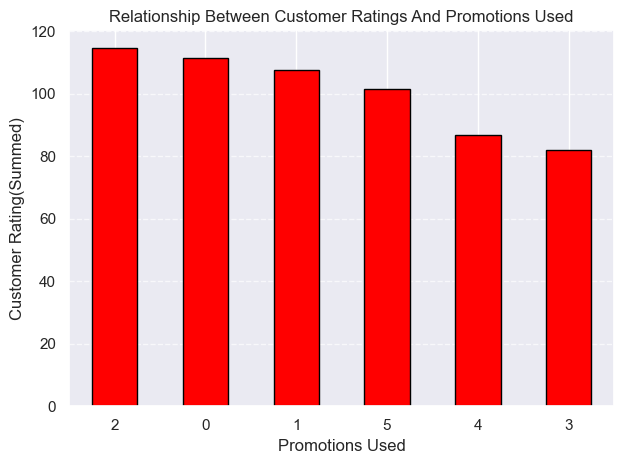

In [652]:
df2.plot(kind='bar', color='red', edgecolor='black')
plt.title('Relationship Between Customer Ratings And Promotions Used')
plt.xlabel('Promotions Used')
plt.ylabel('Customer Rating(Summed)')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color: orange; font-size: 30px;">Promotions used = 2 has the highest total customer rating, which may indicate a strong relationship ✅</span>

# Trend Over Time: Visualize the trend of total revenue over time to identify patterns or seasonal effects.

In [653]:
df.head()

,product_id,store_id,region,date,units_sold,revenue,cost,profit,customer_rating,promotions_used
0,P9481,S31,North,2024-01-01,134,5859.33,5389.78,469.56,4.11,0
1,P5794,S29,North,2024-01-02,179,1216.38,2258.72,-1042.34,2.35,5
2,P2810,S14,East,2024-01-03,417,8207.84,6360.24,1847.60,1.09,5
3,P9069,S43,West,2024-01-04,250,1299.71,6263.57,-4963.86,3.38,4
4,P8196,S33,East,2024-01-05,454,4036.91,5675.40,-1638.50,4.29,0


In [654]:
df3=df.set_index('date')

df3=df3['revenue'].resample('1ME').sum()
df3

date
2024-01-31   174567.73
2024-02-29   151876.81
2024-03-31   171468.53
2024-04-30   139579.25
2024-05-31   153369.41
2024-06-30   164468.61
2024-07-31   121629.70
Freq: ME, Name: revenue, dtype: float64

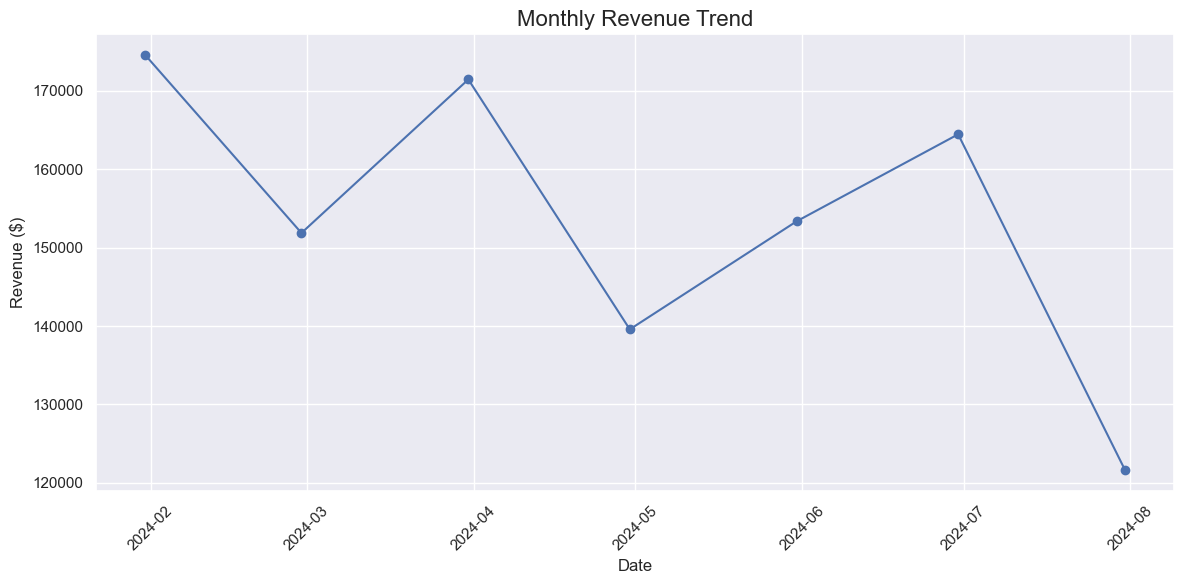

In [655]:

# Plot the revenue trend
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3, marker='o', linestyle='-', label='Revenue Trend')

# Add titles and labels
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add grid for clarity
plt.legend(fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


